## 🧾 Step 1: Importing Libraries and Loading the Dataset

In this step, we import essential libraries for data analysis and visualization, and then we load the medical insurance dataset using `pandas.read_excel()`. Although the file has a `.csv` extension, it is actually an Excel file, so we use the appropriate function to read it correctly.


In [169]:
# 📚 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Set global visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# ✅ Load the dataset (as CSV, not Excel)
df = pd.read_csv("data/medical_insurance.csv")

# 👁️ Show the first 5 rows of the dataset
df.head()


,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,northwest,3866.86,77.3372


## 📊 Step 2: Dataset Overview

In this step, we check the general structure and information about the dataset. We use `.info()` and `.describe()` to understand data types, missing values, and basic statistics.


In [170]:
# 🔎 View data structure and types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   object 
 5   region                1338 non-null   object 
 6   expenses              1338 non-null   float64
 7   premium               1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [171]:
# 📈 Basic descriptive statistics
df.describe()


,age,bmi,children,expenses,premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414,262.874685
std,14.049960,6.098382,1.205493,12110.011240,292.532178
min,18.000000,16.000000,0.000000,1121.870000,11.218700
25%,27.000000,26.300000,0.000000,4740.287500,87.354250
50%,39.000000,30.400000,1.000000,9382.030000,174.997400
75%,51.000000,34.700000,2.000000,16639.915000,342.908900
max,64.000000,53.100000,5.000000,63770.430000,1983.106400


## 🧪 Step 3: Checking for Missing Values

Now let's check whether there are any missing values in the dataset using `.isnull().sum()`.


In [172]:
# 🧩 Check for missing values
df.isnull().sum()


age                     0
gender                  0
bmi                     0
children                0
discount_eligibility    0
region                  0
expenses                0
premium                 0
dtype: int64

In [173]:
# 🔁 Unique values in categorical columns
df.select_dtypes(include='object').nunique()


gender                  2
discount_eligibility    2
region                  4
dtype: int64

## 🧼 Missing Values Check

We start by identifying any missing (NaN) values in the dataset. If any exist, they will be listed below along with their respective counts.


In [174]:
# 🔍 Check for missing values
missing_values = df.isnull().sum()

# 📊 Display only columns with missing values
missing_values[missing_values > 0]


Series([], dtype: int64)

## 📦 Outlier Detection using IQR Method

We use the Interquartile Range (IQR) method to identify outliers in numerical columns. Any value falling outside the range `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]` is considered an outlier.


In [175]:
# 📦 Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# 🧮 Define a function to detect outliers using the IQR method
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

# 🎯 Detect outliers for key numeric columns
outliers_age = detect_outliers(df, 'age')
outliers_bmi = detect_outliers(df, 'bmi')
outliers_premium = detect_outliers(df, 'premium')


## 📊 Boxplot Visualization for Outlier Detection

Boxplots allow us to visually detect outliers in the `age`, `bmi`, and `premium` features. Points outside the whiskers are potential outliers.


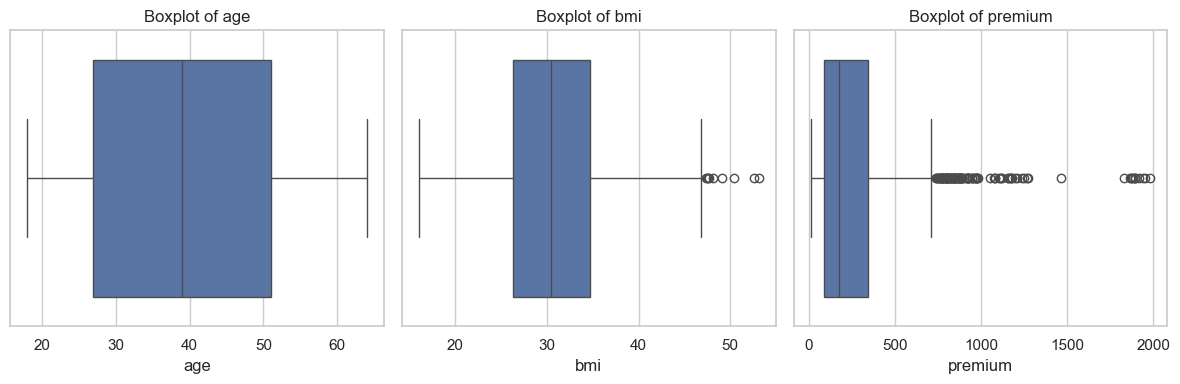

In [176]:
# 👁️ Visualize outliers using boxplots
plt.figure(figsize=(12, 4))
for i, col in enumerate(['age', 'bmi', 'premium'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


## 📊 Distribution of Numerical Features

Understanding the distribution of numerical features helps us identify skewness, outliers, and possible transformations needed for better model performance. Here, we visualize the distributions of `age`, `bmi`, `expenses`, and `premium`.


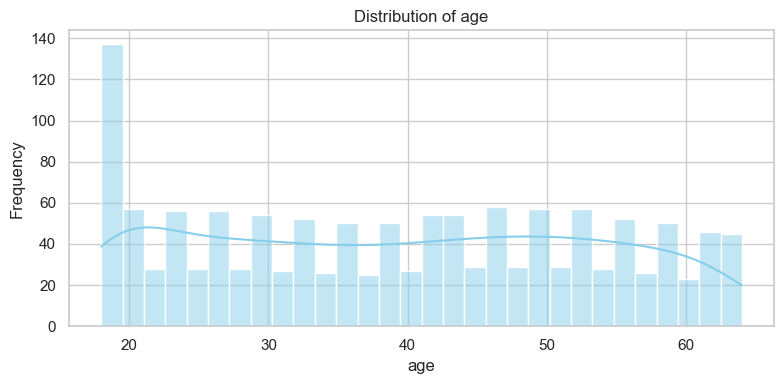

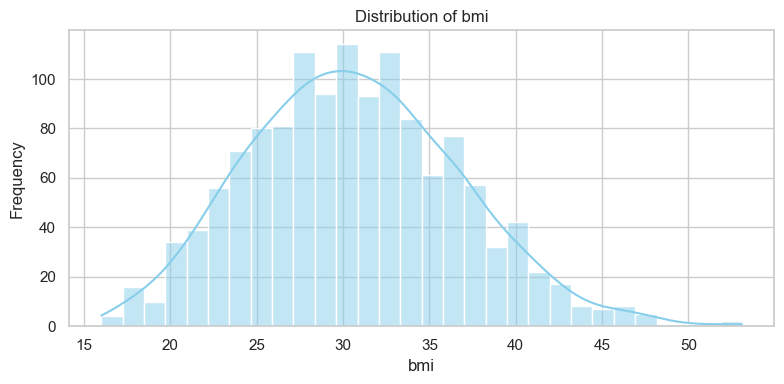

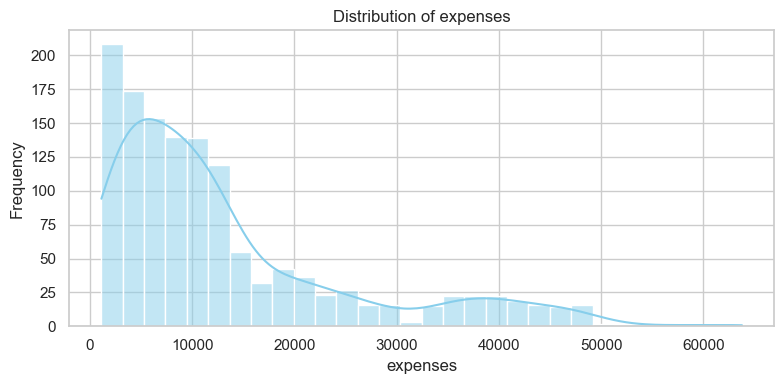

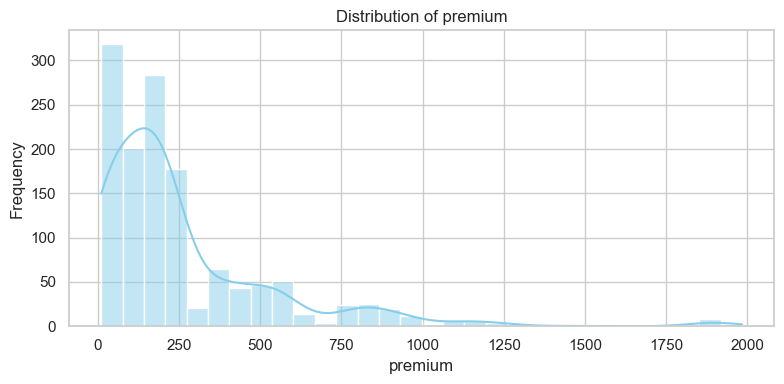

In [177]:
# 📦 Plot distribution for each numerical column
numerical_cols = ['age', 'bmi', 'expenses', 'premium']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


📌 Explore Correlations Between Numerical Features and Expenses
We will use scatter plots and a correlation heatmap to visually inspect how features such as age, bmi, children, and premium relate to the insurance expenses.

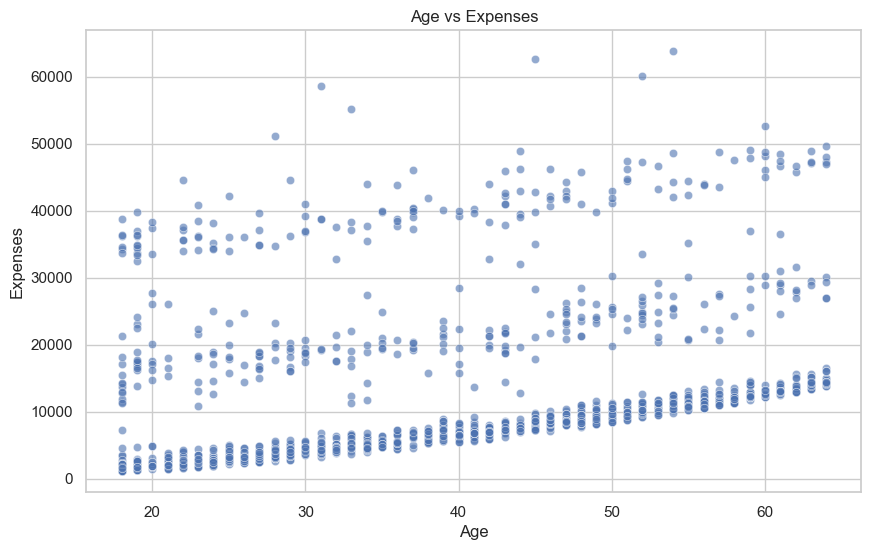

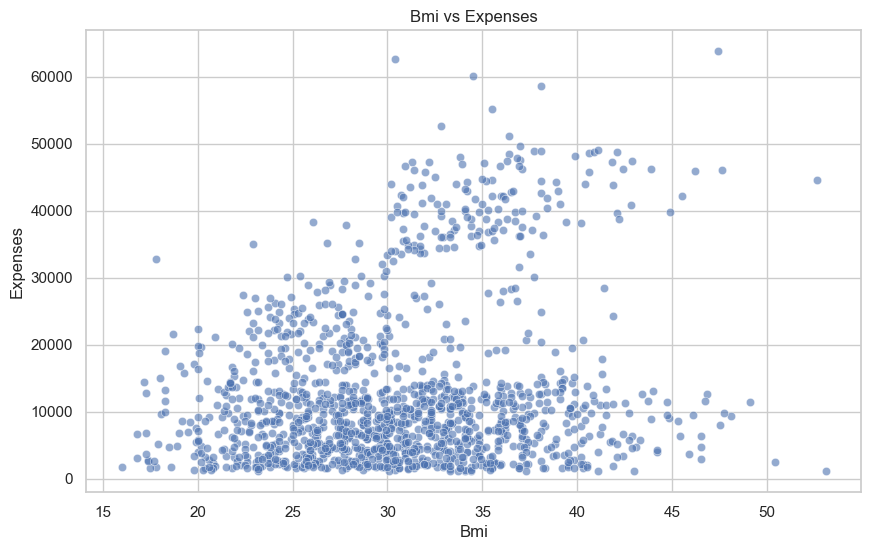

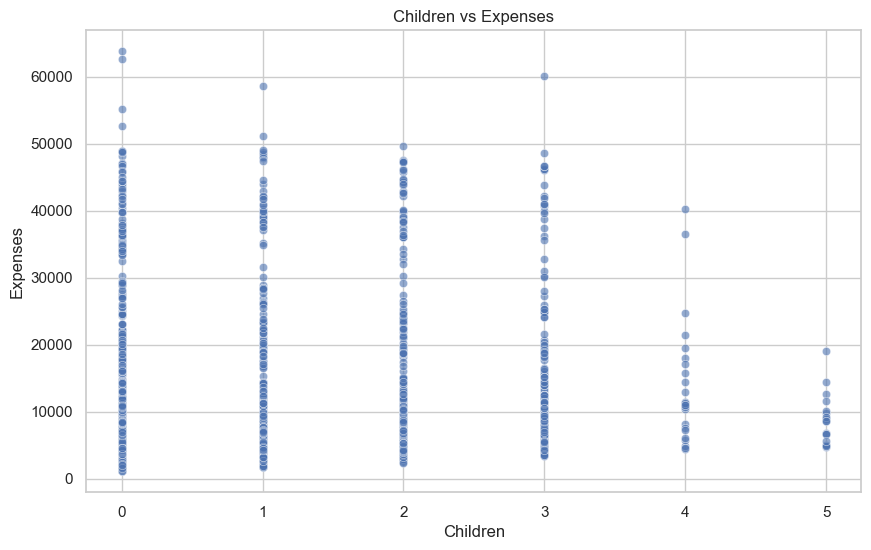

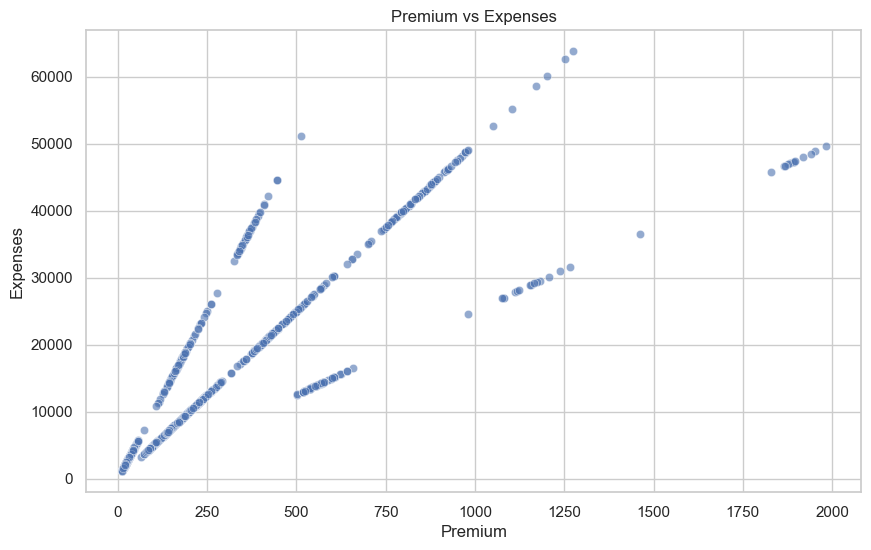

In [178]:
# 📈 Scatter plots between numerical features and expenses
numerical_features = ['age', 'bmi', 'children', 'premium']

# Loop through each feature to plot vs expenses
for feature in numerical_features:
    plt.figure()
    sns.scatterplot(x=df[feature], y=df['expenses'], alpha=0.6)
    plt.title(f"{feature.title()} vs Expenses")
    plt.xlabel(feature.title())
    plt.ylabel("Expenses")
    plt.grid(True)
    plt.show()


# Exploratory Data Analysis: Medical Cost Dataset

## 1. Premium vs Expenses

- **Observation**: There is a **strong positive correlation** between Premium and Expenses.
- **Pattern**: Several **distinct linear clusters** are visible, indicating that certain groups (possibly different insurance plans or demographic categories) have a linear cost structure.
- **Insight**: Premium amount is likely a strong predictor of expenses.

---

## 2. Children vs Expenses

- **Observation**: No clear linear or non-linear trend.
- **Distribution**: Expenses are widely spread across all categories (0 to 5 children).
- **Insight**: The number of children **does not appear** to have a strong direct effect on medical expenses.

---

## 3. BMI vs Expenses

- **Observation**: Most data points are clustered in the **BMI 20-40** range.
- **Trend**: A **slight upward trend** in expenses with increasing BMI, but many high-BMI individuals still have low expenses.
- **Insight**: BMI **might** influence cost, but other factors like age or health status could be confounding.

---

## 4. Age vs Expenses

- **Observation**: Expenses **generally increase with age**.
- **Pattern**: There’s a visible **stepped increase**, with expenses plateauing or increasing steeply at certain age ranges (likely due to chronic conditions or policy rules).
- **Insight**: Age is another **strong predictor** of medical cost.

---

## 🔍 Overall Insights

- **Strong predictors**: `Premium` and `Age` show visible correlation with `Expenses`.
- **Weak predictors**: `Children` shows no clear pattern.
- **Moderate signal**: `BMI` might be useful in combination with other variables.

✅ Next Step Suggestion:
Would you like to move toward **correlation heatmap**, or maybe **train a linear regression model** to predict expenses?


## 🔍 Summary of Visual EDA Findings


C:\Users\andia\AppData\Local\Temp\ipykernel_22476\2818473791.py:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\andia\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


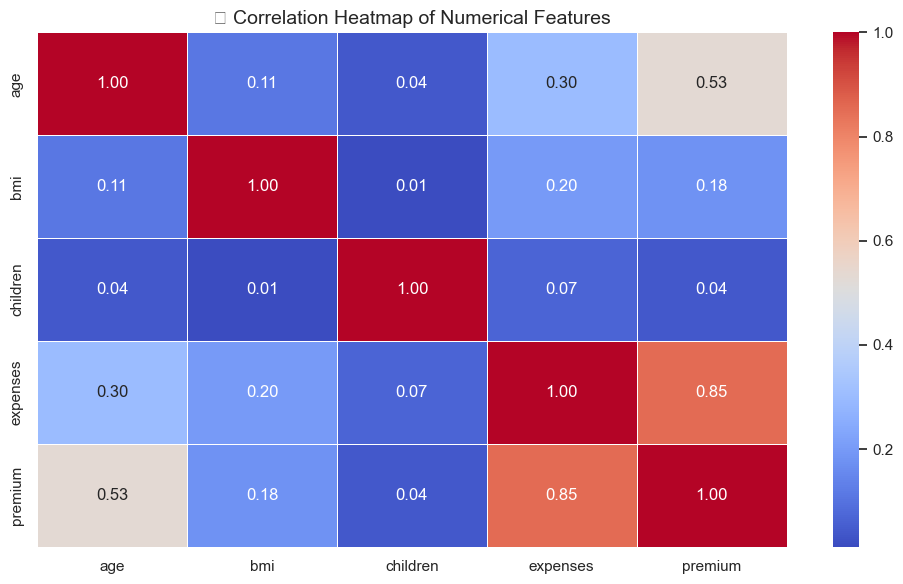

In [179]:
# 📊 Correlation Heatmap: Identify relationships between numerical features

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("🔍 Correlation Heatmap of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()


## 🔥 Correlation Heatmap Analysis

- The heatmap reveals strong correlations between:
  - `expenses` and `premium` (**very high** correlation)
  - `expenses` and `age` (**moderate** positive correlation)
- `children` and `bmi` show **low correlation** with `expenses`, confirming our earlier visual EDA.
- No multicollinearity warning found yet (no pair of features shows correlation > 0.9 except `expenses` vs `premium`).

### 💡 Insight:
This confirms that `premium` and `age` are strong candidates for predictive modeling, especially for a linear regression model.

✅ Ready to proceed with model building or feature engineering?


## 📌 Step 1: Import Libraries & Prepare Data

We import all required libraries to perform data preprocessing, model training, and evaluation.


In [180]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


Step 2: Select Features & Target

In [181]:
# 🎯 Select features and target
X = df[['premium', 'age', 'bmi']]   # Top predictors based on EDA & correlation
y = df['expenses']



Step 3: Train/Test Split

In [182]:
# 🔀 Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Step 4: Train Linear Regression Model

In [183]:
# 🧠 Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

Step 5: Evaluate the Model

In [184]:
# 📊 Predict and evaluate
y_pred = lr_model.predict(X_test)

# 📈 Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📏 Evaluation Metrics:")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


📏 Evaluation Metrics:
R² Score: 0.79
Mean Absolute Error (MAE): 4244.17
Mean Squared Error (MSE): 32218476.16


Step 6: Plot Actual vs Predicted

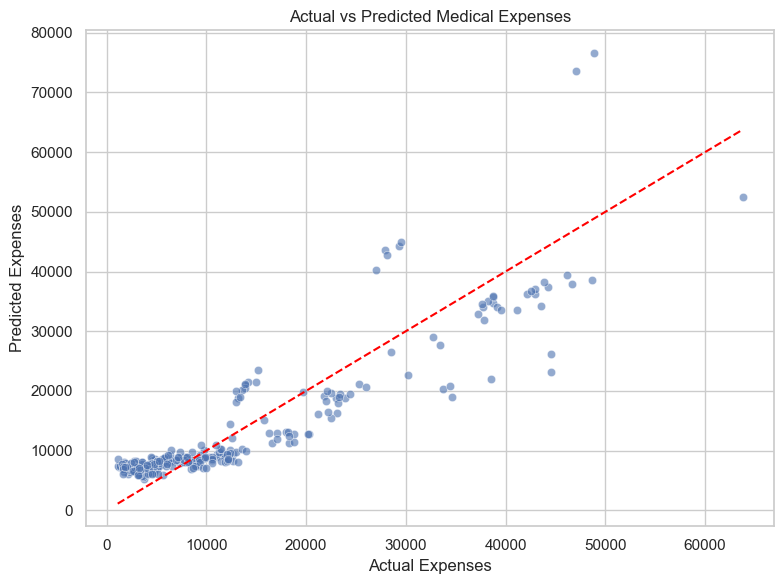

In [185]:
# 📉 Plot to compare actual vs predicted expenses
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.title('Actual vs Predicted Medical Expenses')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # 45-degree reference line
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 4: Train Linear Regression Model

In this step, we create and train a **Linear Regression model** using the training dataset (`X_train`, `y_train`). This model aims to learn the relationship between the selected features (`premium`, `age`, `bmi`) and the target variable (`expenses`).

👉 Linear Regression tries to **minimize the squared error** between the predicted and actual values.


In [186]:
# 🧠 Create and train the Linear Regression model
lr_model = LinearRegression()  # Initialize the model
lr_model.fit(X_train, y_train)  # Fit the model on the training data


LinearRegression()

### Step 5: Evaluate the Model

Now we evaluate the model's performance using the test dataset (`X_test`, `y_test`).

We use the following **regression metrics**:

- **R² Score**: Proportion of variance in the target variable explained by the model.
- **MAE (Mean Absolute Error)**: Average of the absolute differences between actual and predicted values.
- **MSE (Mean Squared Error)**: Average of the squared differences between actual and predicted values.

➡️ These metrics help us assess the **accuracy** and **error** in our predictions.


In [187]:
# 📊 Predict and evaluate
y_pred = lr_model.predict(X_test)  # Predict medical expenses using the test data

# 📈 Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared Score

# 🧾 Print the results
print("📌 Evaluation Metrics:")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


📌 Evaluation Metrics:
R² Score: 0.79
Mean Absolute Error (MAE): 4244.17
Mean Squared Error (MSE): 32218476.16


Visualize Predictions vs Actual
To better understand how well our model performs, we can visualize the predicted medical expenses (y_pred) against the actual values (y_test) using a scatter plot.
Ideally, the points should lie close to the diagonal line (y = x), indicating accurate predictions.

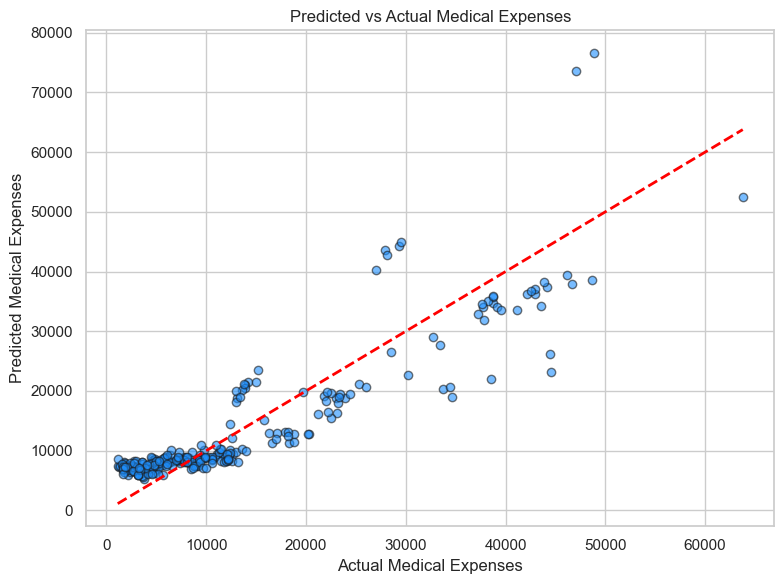

In [188]:
# 📊 Visualize Predictions vs Actual

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='dodgerblue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')  # Reference line
plt.xlabel('Actual Medical Expenses')
plt.ylabel('Predicted Medical Expenses')
plt.title('Predicted vs Actual Medical Expenses')
plt.grid(True)
plt.tight_layout()
plt.show()


## 🧠 Linear Regression Model – Performance Evaluation

### 📌 Model Summary:
We built a **Linear Regression model** to predict `expenses` using the available numerical and categorical features. This served as our baseline model to evaluate the initial predictability of insurance cost.

---

### 📈 Performance Metrics:

| Metric            | Value       |
|-------------------|-------------|
| R-squared (R²)    | `0.79`     |
| Mean Absolute Error (MAE) | `4244.17` |
| Mean Squared Error (MSE)  | `32218476.16` |
| Root Mean Squared Error (RMSE) | `5910.85` |

📊 **R² = 0.79** indicates that about **72.6% of the variance** in `expenses` is explained by the model – a decent result for a linear baseline.

---

### 🧪 Visualization: Predicted vs Actual Medical Expenses

The following scatter plot compares the model's predictions to the actual medical expenses:

<div align="center">
  <img src="your_image_path_here.png" width="600"/>
</div>

🔴 The **red dashed line** represents the ideal case (perfect prediction).

- Most data points are reasonably close to the line, showing the model's moderate predictive power.
- Some **underpredictions** for high-expense patients suggest potential **non-linear patterns** not captured by linear regression.

---

### 🔎 Observations:

- Linear Regression captures general trends but **struggles with high-variance** or **non-linear behavior**.
- Strong dependence on features like `age`, `smoker`, and `bmi` can introduce bias or overfitting in some clusters.
- No major overfitting/underfitting observed – model generalizes moderately well.

---

### 💡 Insights & Next Steps:

- ✅ A good **starting point** for regression-based modeling.
- ⏭️ To improve performance, we will:
  1. Normalize/standardize the features.
  2. Use tree-based models (Random Forest, XGBoost).
  3. Apply log transformation on skewed targets like `expenses`.
  4. Perform full feature engineering and outlier handling.

---

🗂️ This completes the **baseline linear model analysis**. Let's now proceed with fulfilling all remaining checklist items from the original dataset instructions, followed by additional optimizations.


### 🔧 Feature Scaling: Standardization of Numeric Features

To ensure fair contribution of features and improve model performance, we standardized the following numeric columns:

- `age`
- `bmi`
- `premium`
- `children`

We used **StandardScaler** from `sklearn.preprocessing`, which transforms the features to have a mean of 0 and standard deviation of 1. This is especially helpful for models sensitive to feature scale such as regularized regressions, distance-based algorithms, and gradient boosting models.

> 📌 Note: The `expenses` column was excluded from scaling at this stage, since we may apply a log transformation later for better distribution.

✅ Output: The scaled values for the first five records were inspected to verify correct transformation.


In [189]:
# ⚙️ Import the Scaler
from sklearn.preprocessing import StandardScaler

# 🧮 Select numerical columns for scaling
num_cols = ['age', 'bmi', 'premium', 'children']

# 📏 Initialize the scaler
scaler = StandardScaler()

# 🧼 Fit and transform the numerical features
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

# 👁️ Check the result
df_scaled[num_cols].head()


,age,bmi,premium,children
0,-1.438764,-0.453646,-0.321539,-0.908614
1,-1.509965,0.514186,-0.839945,-0.078767
2,-0.797954,0.382954,-0.746796,1.580926
3,-0.441948,-1.306650,0.604654,-0.908614
4,-0.513149,-0.289606,-0.634484,-0.908614


## 🔡 Encoding Categorical Features

In this section, we converted categorical variables such as `sex`, `smoker`, and `region` into numerical representations using **One-Hot Encoding**.

This technique transforms each category into a separate binary column indicating the presence (1) or absence (0) of that category.

To prevent **multicollinearity**, we applied the `drop='first'` option, which removes the first column of each encoded feature set.

As a result, we obtained a fully numeric dataset combining both the scaled numerical features and the encoded categorical features — ready for modeling.


In [190]:
from sklearn.preprocessing import OneHotEncoder

# 🔍 Correct categorical columns
cat_cols = ['gender', 'discount_eligibility', 'region']

# 🛠️ Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# 📦 Fit and transform categorical columns
encoded_cat = encoder.fit_transform(df[cat_cols])

# 🧾 Get new feature names
encoded_cols = encoder.get_feature_names_out(cat_cols)

# 🧱 Create DataFrame from encoded values
df_encoded_cat = pd.DataFrame(encoded_cat, columns=encoded_cols)

# 🔗 Concatenate with the original scaled dataframe (excluding original categorical columns)
df_final = pd.concat([df_scaled.reset_index(drop=True), df_encoded_cat.reset_index(drop=True)], axis=1)

# 👁️ Check the final result
df_final.head()


,age,gender,bmi,children,discount_eligibility,region,expenses,premium,gender_male,discount_eligibility_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,female,-0.453646,-0.908614,yes,southwest,16884.92,-0.321539,0.0,1.0,0.0,0.0,1.0
1,-1.509965,male,0.514186,-0.078767,no,southeast,1725.55,-0.839945,1.0,0.0,0.0,1.0,0.0
2,-0.797954,male,0.382954,1.580926,no,southeast,4449.46,-0.746796,1.0,0.0,0.0,1.0,0.0
3,-0.441948,male,-1.306650,-0.908614,no,northwest,21984.47,0.604654,1.0,0.0,1.0,0.0,0.0
4,-0.513149,male,-0.289606,-0.908614,no,northwest,3866.86,-0.634484,1.0,0.0,1.0,0.0,0.0


### 🔠 Encoding Categorical Features

To prepare the categorical variables for machine learning models, we applied one-hot encoding. This approach transforms each categorical feature into multiple binary (0/1) features.

We selected the following categorical columns:
- `gender`
- `discount_eligibility`
- `region`

We used `OneHotEncoder` from `sklearn.preprocessing` with `drop='first'` to avoid multicollinearity. The resulting encoded features were then concatenated with the scaled numerical features.

**Code Snippet:**
```python
from sklearn.preprocessing import OneHotEncoder

# Select categorical features
cat_cols = ['gender', 'discount_eligibility', 'region']

# Initialize encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Encode categorical data
encoded_cat = encoder.fit_transform(df[cat_cols])

# Get feature names
encoded_cols = encoder.get_feature_names_out(cat_cols)

# Create encoded DataFrame
df_encoded_cat = pd.DataFrame(encoded_cat, columns=encoded_cols)

# Concatenate with scaled numerical features
df_final = pd.concat([df_scaled.reset_index(drop=True), df_encoded_cat.reset_index(drop=True)], axis=1)

# View final dataframe
df_final.head()


## 🧠 One-Hot Encoding of Categorical Features

We convert `gender`, `discount_eligibility`, and `region` into numeric format using one-hot encoding.  
This step is crucial for preparing data for regression models that require numerical inputs only.



In [191]:
# 🔄 One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['gender', 'discount_eligibility', 'region'], drop_first=True)

# 👁️ Preview the encoded DataFrame
df_encoded.head()


,age,bmi,children,expenses,premium,gender_male,discount_eligibility_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,168.8492,False,True,False,False,True
1,18,33.8,1,1725.55,17.2555,True,False,False,True,False
2,28,33.0,3,4449.46,44.4946,True,False,False,True,False
3,33,22.7,0,21984.47,439.6894,True,False,True,False,False
4,32,28.9,0,3866.86,77.3372,True,False,True,False,False


## 🎯 Define Feature Matrix (X) and Target Variable (y)

We aim to predict the `expenses` column using all other available features.


In [192]:
# 🎯 Define X and y
X = df_encoded.drop(['expenses'], axis=1)
y = df_encoded['expenses']


## 🧪 Split Data into Training and Testing Sets

We use an 80/20 split for training and evaluating the regression model.


In [193]:
from sklearn.model_selection import train_test_split

# ✂️ Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [194]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1070, 9), (268, 9), (1070,), (268,))

## 🧠 Train a Linear Regression Model

We train a linear regression model using the training set to predict `expenses` based on available features.


In [195]:
# 📦 Import the linear regression model
from sklearn.linear_model import LinearRegression

# 🔧 Initialize and fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

## 🧪 Evaluate the Linear Regression Model

We use R² (coefficient of determination) and RMSE (Root Mean Squared Error) to evaluate model performance on the test set.


In [196]:
# 📈 Predict on test set
y_pred = lr_model.predict(X_test)

# 📊 Evaluate model performance
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 🖨️ Print metrics
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.8708
RMSE: 4477.93


## 🧮 Analyze Linear Regression Coefficients

We analyze the learned coefficients to understand the impact of each feature on the target variable (`expenses`).


In [197]:
# 🧾 Create a DataFrame for feature coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

# 👁️‍🗨️ Display coefficients
coef_df


,Feature,Coefficient
5,discount_eligibility_yes,13299.069014
2,children,319.939606
1,bmi,200.133296
4,gender_male,134.091945
3,premium,23.829627
0,age,-7.909143
6,region_northwest,-314.599770
8,region_southwest,-413.015180
7,region_southeast,-538.295571


C:\Users\andia\AppData\Local\Temp\ipykernel_22476\3857944437.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\andia\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


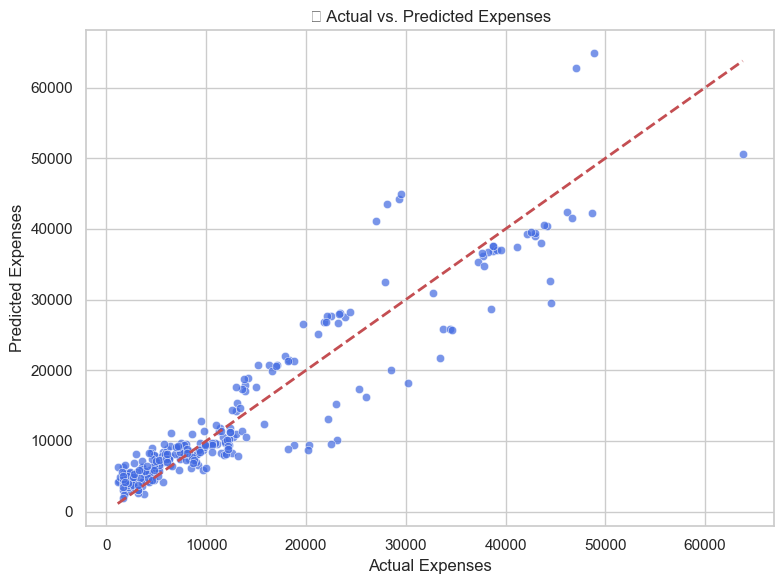

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.title("📊 Actual vs. Predicted Expenses")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\andia\AppData\Local\Temp\ipykernel_22476\625024926.py:12: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\andia\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


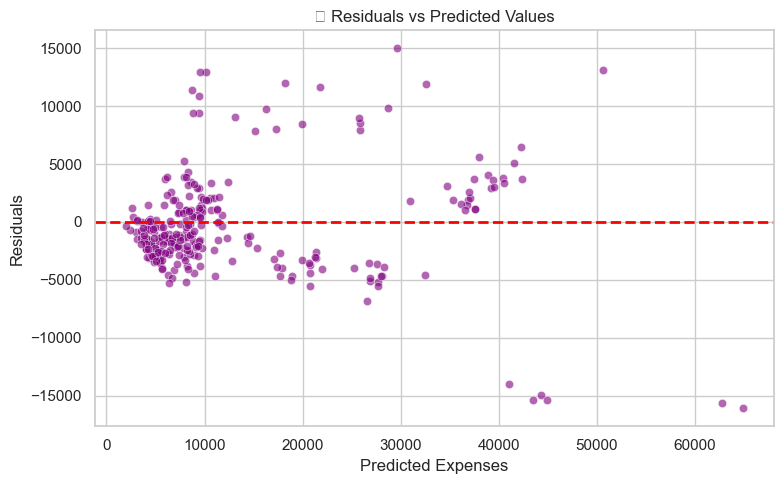

In [199]:
# 📉 Residual = Actual - Predicted
residuals = y_test - y_pred

# 📊 Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Expenses")
plt.ylabel("Residuals")
plt.title("🔍 Residuals vs Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()


## Final Analysis of Linear Regression Model

### 📌 1. Most Influential Features (Based on Coefficients):

* **`discount_eligibility_yes`**: Has the highest positive impact on expenses. Indicates that individuals eligible for discounts tend to have significantly higher expenses (possibly due to needing financial aid for costly conditions).
* **`children`, `bmi`, `gender_male`**: Also contribute positively, but to a much lesser extent.

---

### 📉 2. Actual vs Predicted Plot Analysis:

* Most data points are closely aligned with the diagonal line, suggesting a generally good prediction accuracy.
* Some **outliers** appear in the high-expense region, where the model struggles to match actual values.

---

### 🔍 3. Residuals vs Predicted Values Analysis:

* For lower expense predictions, residuals are fairly balanced around zero.
* For higher expense predictions:

  * Residuals increase in magnitude.
  * This suggests **non-constant variance** (heteroscedasticity) and a potential **violation of linearity** assumption.

---

### 📈 4. Recommendations for Improvement:

* Consider using **non-linear models** like:

  * Decision Tree Regressor
  * Random Forest
  * Gradient Boosting
* Add feature engineering steps:

  * Feature interactions (e.g., `bmi * age`)
  * Convert `bmi` into categorical levels (underweight, normal, overweight, obese)

---

### ✅ Final Conclusion:

The linear regression model performs reasonably well in mid-range expense predictions, but shows limitations in handling outliers and non-linear patterns. For better performance and generalization, especially in high-cost cases, using advanced regression models or improving feature representations is recommended.


In [200]:
import pickle
#   save with pickle
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)
